In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# get features and target
X, y = train_data.drop(columns='label'), train_data['label']

X.shape, y.shape

((42000, 784), (42000,))

In [6]:
# split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=20)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

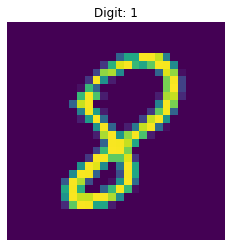

In [7]:
# print(X_train.to_numpy()[0].reshape(28, 28))
# plot the number of the first row
x_train_first_row_reshaped = X_train.to_numpy()[0].reshape(28, 28) 
plt.imshow(x_train_first_row_reshaped)
plt.title(f"Digit: {y_train[0]}")
plt.axis("off")
plt.show()

(-0.5, 27.5, 27.5, -0.5)

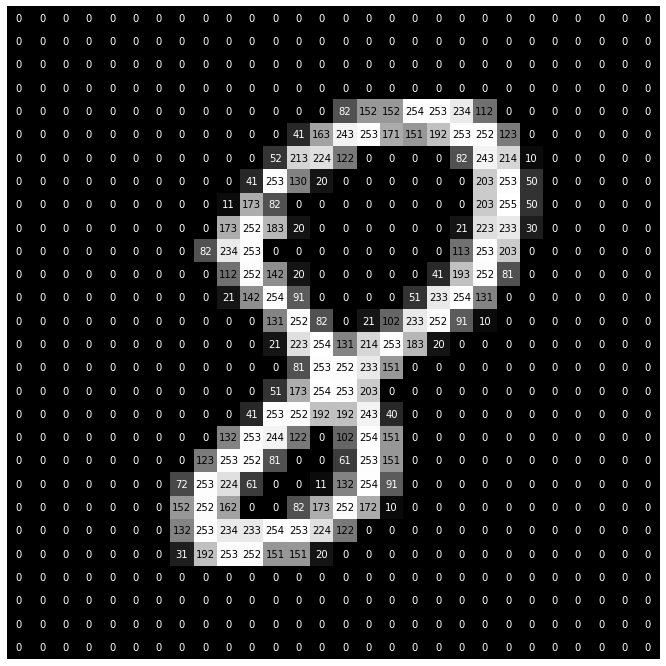

In [8]:
# inspect img more closely
def visualize_input(img, ax):
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    thresh = img.max() / 2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy = (y,x), 
                        horizontalalignment="center",
                        verticalalignment="center",
                        color="white" if (img[x][y] < thresh) else "black")
            
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(x_train_first_row_reshaped, ax)
plt.axis("off")

In [9]:
# convert dataset to numpy
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_val, y_val = X_val.to_numpy(), y_val.to_numpy()

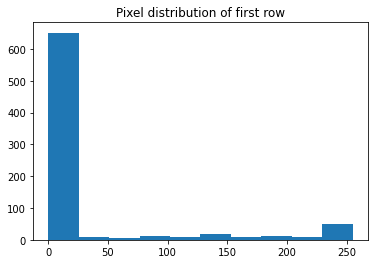

In [10]:
# plot pixels of first row 
plt.hist(X_train[0].reshape(784))
plt.title("Pixel distribution of first row")
plt.show()

In [11]:
# scale pixels
X_train, X_val = X_train / 255, X_val / 255

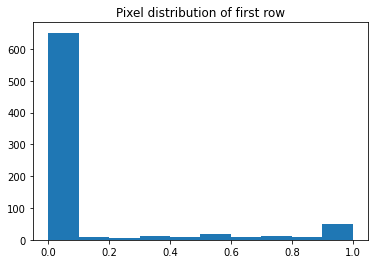

In [12]:
# plot pixels of first row after scaling
plt.hist(X_train[0].reshape(784))
plt.title("Pixel distribution of first row")
plt.show()

(-0.5, 27.5, 27.5, -0.5)

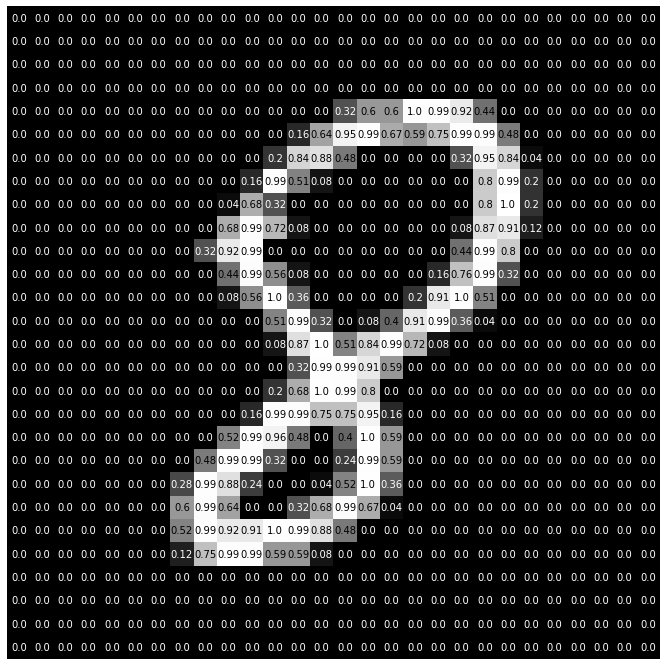

In [13]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0].reshape(28, 28), ax)
plt.axis("off")

In [14]:
# one-hot encoding
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([2891, 3263, 2927, 3030, 2884, 2637, 2952, 3077, 2818, 2921]))

In [15]:
# encode target
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

In [16]:
[X_train.shape[1]]

[784]

Build the model

In [17]:
import warnings

# Mute warnings
warnings.filterwarnings("default")

In [18]:
model = keras.Sequential([
    layers.Dense(516, activation="relu"),
    layers.Dropout(0.7),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(10, activation="softmax")
])

2022-11-11 05:10:39.245736: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy", 
              metrics=["categorical_accuracy"])

In [20]:
# early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(patience=4,
                                               min_delta=0.001,
                                               restore_best_weights=True)

In [21]:
# train the model
training = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=25,
    callbacks=[early_stopping],
    verbose=0
)

2022-11-11 05:10:39.621966: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 516)               405060    
_________________________________________________________________
dropout (Dropout)            (None, 516)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              529408    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 944,718
Trainable params: 944,718
Non-trainable params: 0
_________________________________________________________________


In [23]:
# evaluate model
loss_n_metrics = model.evaluate(X_val, y_val, verbose=2)

print(f"Value loss: {loss_n_metrics[0]}")
print(f"Value accuracy: {loss_n_metrics[1]}")

394/394 - 1s - loss: 0.0871 - categorical_accuracy: 0.9746
Value loss: 0.087070532143116
Value accuracy: 0.9746031761169434


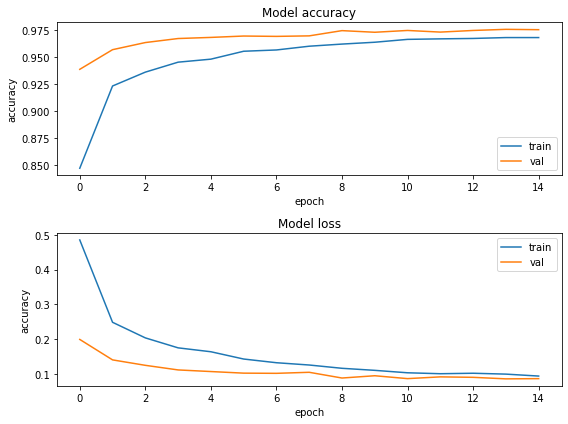

In [24]:
# learning curve of model with loss and accuracy
fig = plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(training.history['categorical_accuracy'])
plt.plot(training.history['val_categorical_accuracy'])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title("Model loss")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.show()

In [25]:
# predict the test dataset and return the exact number not an array (decode it)
y_pred = np.argmax(model.predict(test_data.to_numpy()), axis=-1)

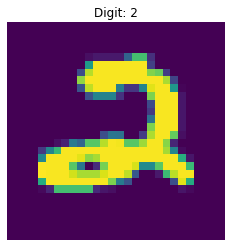

In [26]:
# inspect first row of prediction
plt.imshow(test_data.to_numpy()[0].reshape(28, 28))
plt.title(f"Digit: {y_pred[0]}")
plt.axis("off")
plt.show()

In [27]:
# SUBMISSION
submission = pd.DataFrame({ 'ImageId': pd.Series(list(range(1, len(y_pred) + 1))),
                              'Label': pd.Series(y_pred)})

submission.to_csv("submission.csv", index=False)
print("Mission success!")

Mission success!


In [28]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3
